In [253]:
#schillinger 
import numpy as np

In [635]:
#schillinger functions

class SchillingerRythm:
    
    common_product = []
    generators = []
    resultant = []
    
    complementary_generators = []
    complementary_resultant = []
    
    def __init__(self, fraction):
        self.common_product = []
        self.generators = []
        self.resultant = []
        self.complementary_generators = []
        self.complementary_resultant = []
        
        self.binary_syncronisation(fraction)

    def binary_syncronisation_result(self, fraction, seq_len):
        result = [] 
        count = 1
        flag = True
        for i in range(1, seq_len):
            for m in fraction:
                if i % m == 0:
                    flag = True
                    break
                else:
                    flag = False
            if flag:
                result.append(count)
                count = 1
            else:
                count += 1
        result.append(count)
        return result

    def binary_syncronisation(self, fraction):
        seq_len = np.prod(fraction)
        # fill in lists
        #print(seq_len)
        self.common_product = [1]*seq_len
        complementary_fraction = []
        for generator in fraction:
            num = int(seq_len/generator)
            self.generators.append([generator]*num)
            #complementary
            com_num = int(seq_len/num)
            complementary_fraction.append(num)
            self.complementary_generators.append([num]*com_num)
            
        self.resultant = self.binary_syncronisation_result(fraction, seq_len)
        self.complementary_resultant = self.binary_syncronisation_result(complementary_fraction, seq_len)


In [636]:
# plotting

import matplotlib.pyplot as plt

def convert_to_plot(data): # converting numbers  1 1 1 1 to oscillation 1 0 1 0 or 3 2 to 1 1 1 0 0
    plot_array = []
    bit = 1
    plot_array.append(0)
    for i, e in enumerate(data):
        seq = [bit%2]*e
        for s in seq:
            plot_array.append(s)
        bit+=1
    return plot_array


def show_graph(common_product, generators, resultant):
    
    length = len(convert_to_plot(common_product))
    x_vals = range(length)
    #fig, ax = plt.subplots(figsize=(20, 10))
    fig, ax = plt.subplots()
    ax.set_xlim(xmin=-1, xmax=length)
    ax.set_ylim(ymin=-((len(generators) * 2 )+ 3), ymax=2)
    
    ax.step(x_vals, convert_to_plot(common_product), color='black')
    
    count = 0
    for i,e in enumerate(generators):
        count+=2
        gen = convert_to_plot(e)
        ax.step(x_vals, [x-count for x in gen], color='black')
    
    count+=2
    ax.step(x_vals, [x-count for x in convert_to_plot(resultant)], color='black')
    
    ax.grid()
    #ax.set_xticks([x+x for x in convert_to_plot(resultant)])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks(range(len(common_product)+1))
    ax.grid(True)
    plt.show();
        

In [637]:
fraction = [3,2]
sr = SchillingerRythm(fraction)
print(sr.common_product, sr.generators, sr.resultant)
print(sr.common_product, sr.complementary_generators, sr.complementary_resultant)

[1, 1, 1, 1, 1, 1] [[3, 3], [2, 2, 2]] [2, 1, 1, 2]
[1, 1, 1, 1, 1, 1] [[2, 2, 2], [3, 3]] [2, 1, 1, 2]


normal


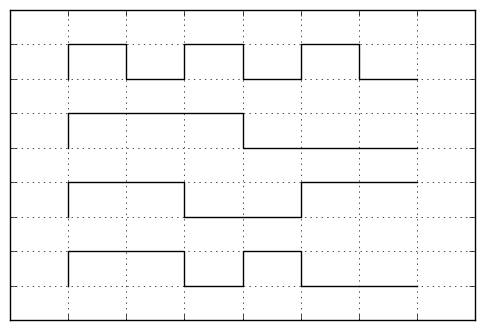

complementary


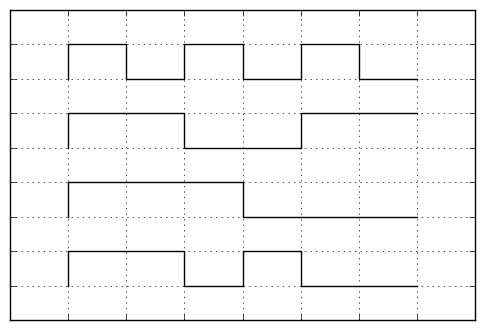

In [633]:
# plot results
print("normal")
show_graph(sr.common_product, sr.generators, sr.resultant)
print("complementary")
show_graph(sr.common_product, sr.complementary_generators, sr.complementary_resultant)